Done. You have the matrices PP QQ  RR  SS  WW.
  
Done. You have the matrices "Response" and "Response_named" 
which contain the models simulated reponses to
given values for the exogenous stochastic processes.
  
  
Here are the UNFILTERED SIMULATED series.
Total Simulation Length =  500
Number of Initial Values Discarded =  100
  
  
Trend and cycle components have been computed.
The matrices Mat_trend, Mat_trend_named,
Mat_cycle, Mat_cycle_named can be downloaded
to excel or used to make plots.
  
Detrending Filter Used:  Hodrick-Prescott
  
  
Simulated Series, Trend Component, Cyclical Comoponent
x-axis: time periods,  y-axis:  %-deviation from steady state
  


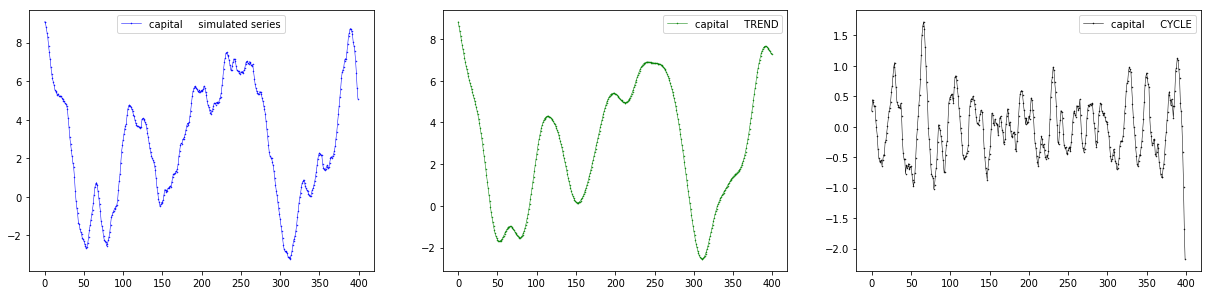

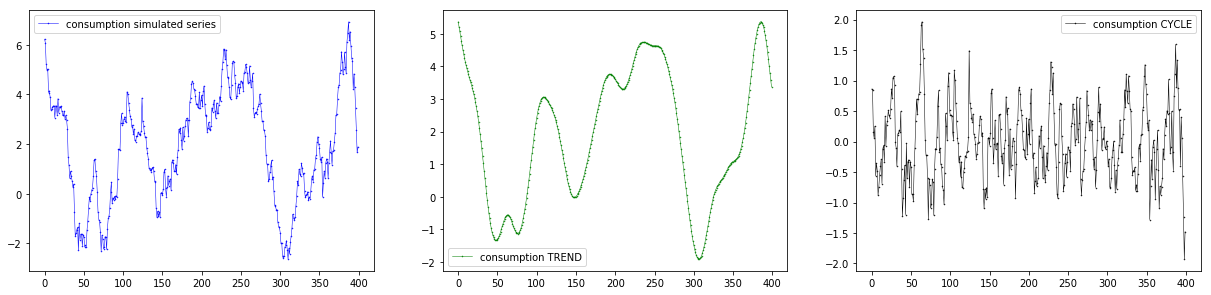

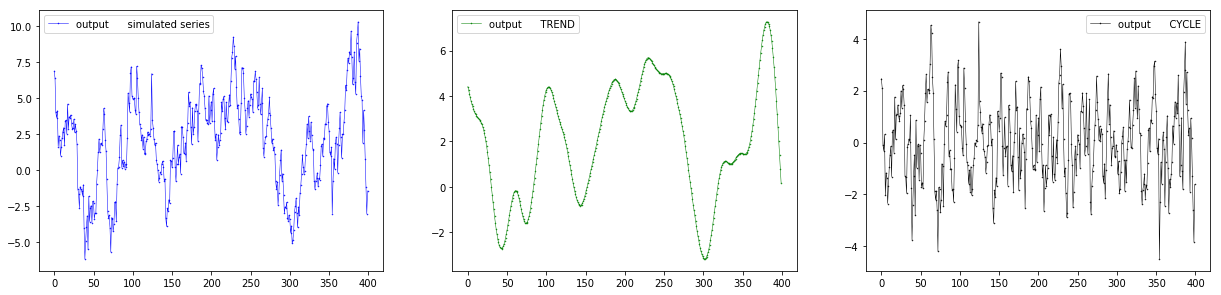

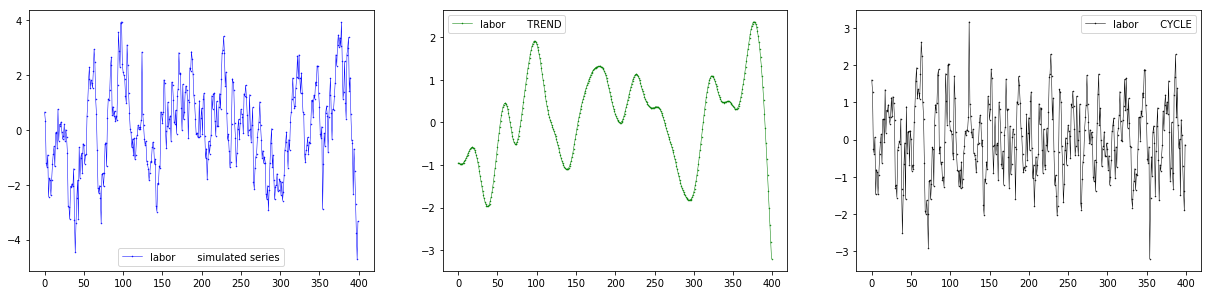

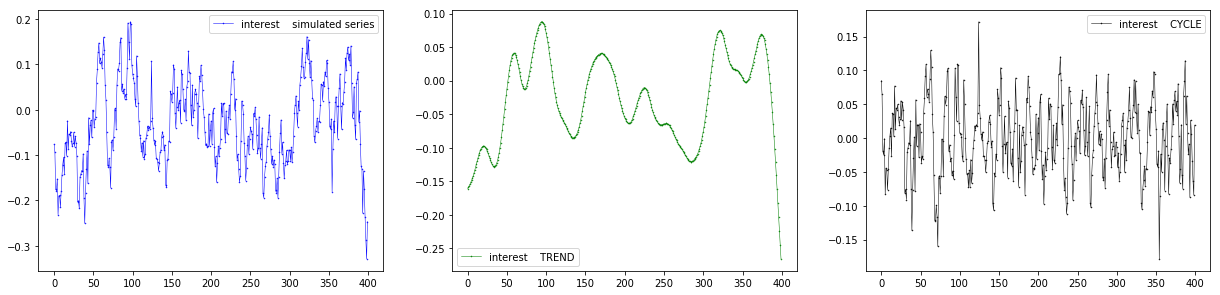

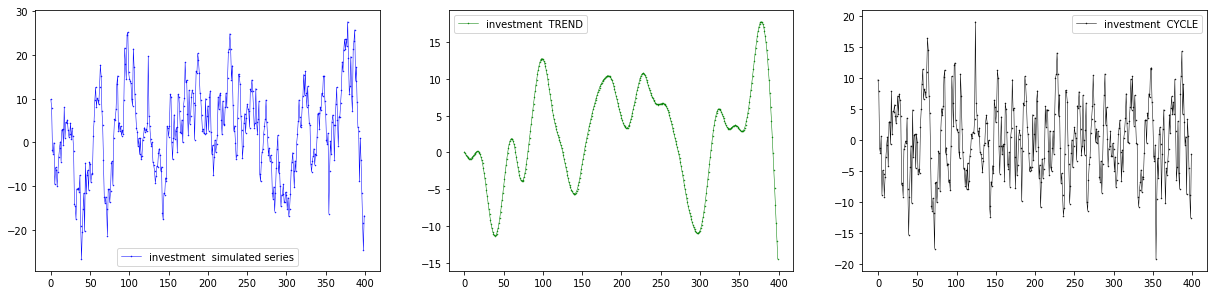

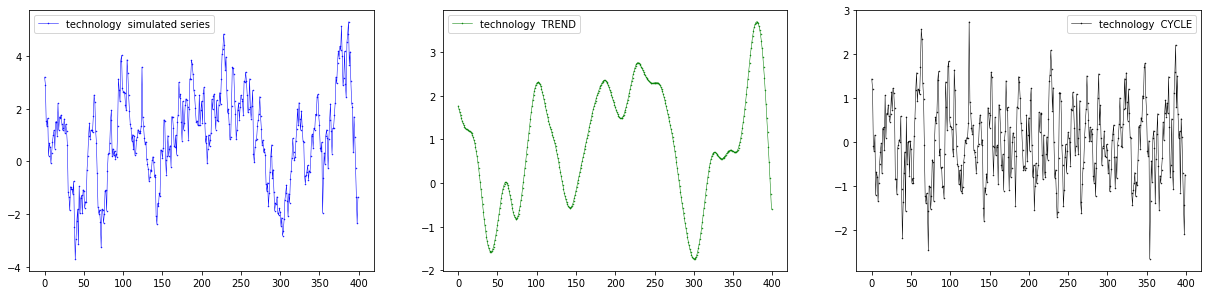

  
  
Shocks used in simulation
  


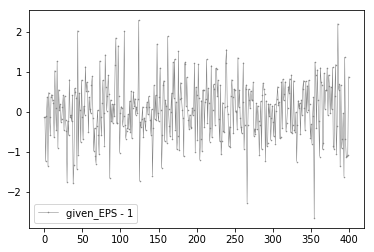

   
   
  
  
  
Here are the moments for the simulated series.
You can also dowload these in tables Mom_Table_01 to _04.
  
  
 
Table 01:  Mean, Standard Deviation, Coefficient of Variation
 


,Mean,Std Deviation,Coeff of Variation
capital,3.98e-14,5.15e-01,1.29e+13
consumption,2.03e-14,6.00e-01,2.95e+13
output,5.00e-14,1.53e+00,3.06e+13
labor,6.12e-15,9.91e-01,1.62e+14
interest,-1.59e-15,5.36e-02,-3.38e+13
investment,1.35e-13,6.03e+00,4.48e+13
technology,1.28e-14,8.85e-01,6.89e+13


 
 
 
Table 02:  Cross Correlation with Output, Standard Deviation Relative to Output
 


,Correlation with GDP,Std Dev Relative to GDP
capital,4.23e-01,3.37e-01
consumption,9.35e-01,3.93e-01
output,1.00e+00,1.00e+00
labor,9.77e-01,6.48e-01
interest,9.45e-01,3.51e-02
investment,9.87e-01,3.95e+00
technology,9.99e-01,5.79e-01


 
 
  
Table 03:  Autocorrelations  t + Leads  t=0  t - Lags  (Not Cross Correlations)
 


,capital,consumption,output,labor,interest,investment,technology
6,1.40e-01,-7.59e-02,-1.82e-01,-2.12e-01,-2.14e-01,-2.07e-01,-1.92e-01
5,3.00e-01,4.53e-02,-7.38e-02,-1.05e-01,-1.06e-01,-1.01e-01,-8.43e-02
4,4.72e-01,2.02e-01,7.95e-02,4.88e-02,4.88e-02,5.29e-02,6.89e-02
3,6.43e-01,3.80e-01,2.60e-01,2.31e-01,2.31e-01,2.35e-01,2.50e-01
2,7.99e-01,5.37e-01,4.15e-01,3.84e-01,3.83e-01,3.88e-01,4.05e-01
1,9.28e-01,7.49e-01,6.62e-01,6.38e-01,6.37e-01,6.42e-01,6.54e-01
0,1.00e+00,1.00e+00,1.00e+00,1.00e+00,1.00e+00,1.00e+00,1.00e+00
-1,9.28e-01,7.49e-01,6.62e-01,6.38e-01,6.37e-01,6.42e-01,6.54e-01
-2,7.99e-01,5.37e-01,4.15e-01,3.84e-01,3.83e-01,3.88e-01,4.05e-01
-3,6.43e-01,3.80e-01,2.60e-01,2.31e-01,2.31e-01,2.35e-01,2.50e-01


 
 
  
Table 04:  Cross Correlations with Output  t + Leads  t=0  t - Lags
 


,capital,consumption,output,labor,interest,investment,technology
6,-4.19e-01,-3.04e-01,-1.82e-01,-9.63e-02,-4.87e-02,-1.18e-01,-1.62e-01
5,-4.04e-01,-2.15e-01,-7.38e-02,1.65e-02,6.46e-02,-6.28e-03,-5.28e-02
4,-3.44e-01,-7.38e-02,7.95e-02,1.67e-01,2.11e-01,1.46e-01,1.01e-01
3,-2.34e-01,1.08e-01,2.60e-01,3.36e-01,3.70e-01,3.18e-01,2.79e-01
2,-8.59e-02,2.86e-01,4.15e-01,4.68e-01,4.87e-01,4.57e-01,4.29e-01
1,1.26e-01,5.58e-01,6.62e-01,6.83e-01,6.81e-01,6.81e-01,6.70e-01
0,4.23e-01,9.35e-01,1.00e+00,9.77e-01,9.45e-01,9.87e-01,9.99e-01
-1,5.86e-01,7.39e-01,6.62e-01,5.74e-01,5.16e-01,5.99e-01,6.44e-01
-2,6.44e-01,5.72e-01,4.15e-01,2.94e-01,2.24e-01,3.26e-01,3.89e-01
-3,6.56e-01,4.57e-01,2.60e-01,1.25e-01,4.98e-02,1.60e-01,2.30e-01


In [2]:
#  Uhlig's Exampl2.m
#  G. Hansen Indivisible Labor and Business Cycle (JME, 1985)
#   RBC Model with Monopolistically Competitive Intermediate Sector

import numpy as np

N_bar     = 1.0/3
Z_bar     = 1
rho       = .36
delta     = .025
R_bar     = 1.0101
eta       = 1.0
psi       = .95
sigma_sigma = .712
alpha   = .7

betta   = 1.0/R_bar
YK_bar  = (R_bar + delta - 1)/(alpha*rho)
K_bar   = (YK_bar / Z_bar)**(1.0/(rho-1)) * N_bar
I_bar   = delta * K_bar
Y_bar   = YK_bar * K_bar
C_bar   = Y_bar - delta*K_bar
D_bar   = alpha * rho * YK_bar
A       =  C_bar**(-eta) * (1 - rho) * alpha * Y_bar/N_bar

VARNAMES = ['capital    ',
                         'consumption',
                         'output     ',
                         'labor      ',
                         'interest   ',
                         'investment ',
                         'technology ']

AA = np.vstack(([0],
                          [- K_bar],
                          [0],
                          [0],
                          [0]))


BB = np.vstack(( [0],
           [(1-delta)*K_bar],
           [rho],
           [0],
           [- D_bar ]))

CC = np.vstack(([ -C_bar, Y_bar, 0, 0, -I_bar],
           [0,           0,          0,        0,        I_bar],  
           [0,           -1,         1-rho,    0,        0],      
           [-eta,        1,          -1,       0,        0],      
           [0, D_bar, 0, - R_bar, 0 ]))

DD = np.vstack(([0],
          [0],
          [1],
          [0],
          [0]))

FF = [ 0 ]

GG = [ 0 ]

HH = [ 0 ]

JJ = np.matrix([ -eta,  0,  0,  1,  0])

KK = np.matrix([ eta,   0,  0,  0,  0])

LL = [ 0 ]

MM = [ 0 ]

NN = [psi]

Sigma = [sigma_sigma**2]

Sigma_EPS = Sigma


%run Uhlig_solver_abreviated.ipynb

#print(' ')
#print('PP')
#print(PP.shape)
#print(PP)
#print(' ')
#print('RR')
#print(RR.shape)
#print(RR)
#print(' ')
#print('QQ')
#print(QQ.shape)
#print(QQ)
#print(' ')
#print('SS')
#print(SS.shape)
#print(SS)
#print(' ')


%run Uhlig_simul_rand.ipynb

%run Detrend_Filters.ipynb

##  USER INPUT:  Remember to set
##  output_index  in the Calc_Moments.ipynb
## This is different for each model

output_index = 2

%run Calc_Moments.ipynb

